In [1]:
import uproot
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    # val, counts = np.mean(DV_vertexing_uncertainty.array()) 
    # print(f'{100*counts[1]/counts.sum():0.2f}% fall in the tracking-uncertainty only bin', hist_file)
    # break


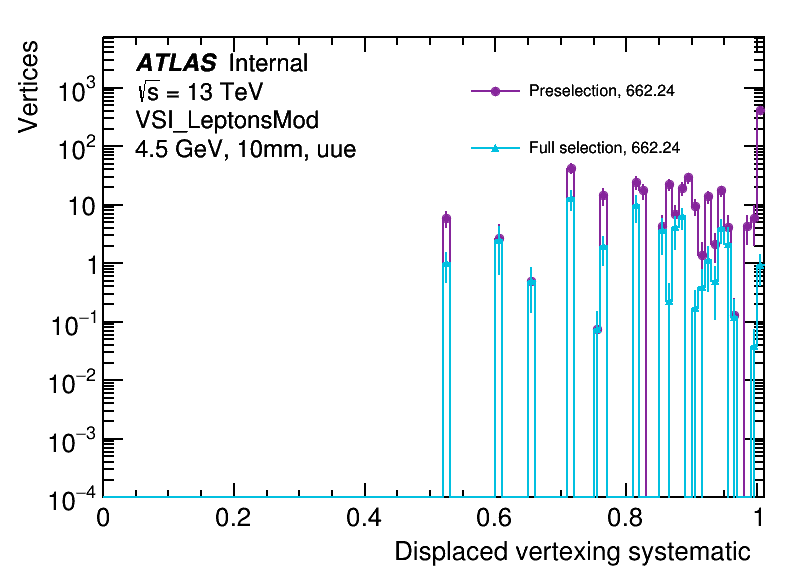

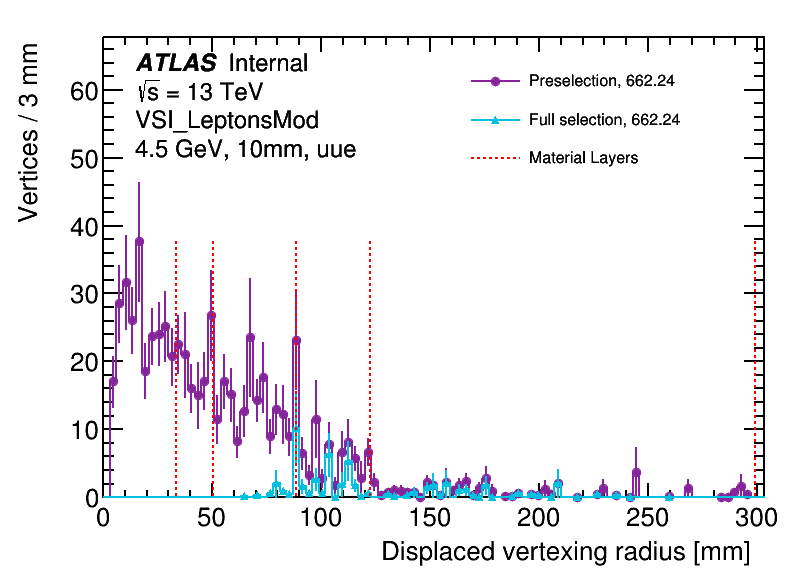

Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/vertexing/plots/vertexing_1DOWN.pdf has been created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/vertexing/plots/vertexing_1DOWN.png has been created
Info in <TCanvas::Print>: pdf file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/vertexing/plots/DV_r.pdf has been created
Info in <TCanvas::Print>: png file /home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/vertexing/plots/DV_r.png has been created


In [8]:
import sys
sys.path.append('/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/dhnlplotting/util')

import glob
import os
from plot_base import PlotBase
from IPython.display import display, Image
import ROOT
ROOT.gROOT.SetStyle("ATLAS")
from array import array
import importlib
import plot_base
import plot_util
import plot_classes
import numpy as np
importlib.reload(plot_base)
importlib.reload(plot_util)
importlib.reload(plot_classes)

signal_selection = {
    'uuu': "*(DV_2medium > 0) \
            *(DV_mass > 5.5) \
            *(DV_pass_lep_pt >0) \
            *((mll_dMu_plep_is_OS ==1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100)) || mll_dMu_plep_is_SS ==1 ) \
            *(mvis>40 && mvis < 90) \
            *(HNLm<25) \
            *(DV_cosmic_sep > 0.05)",

    'eee': "*(DV_2veryveryloose > 0) \
            *(DV_pass_lep_pt >0) \
            *(DV_mass > 5.5) \
            *((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100)) || mll_dEl_plep_is_SS==1) \
            *(DV_pass_mat_veto >0) \
            *(mvis>40 && mvis < 90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",

    'uue': "*(DV_medium_veryveryloose > 0) \
            *(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150) \
            *DV_r + 7 ) || DV_mass > 5.5) \
            *(DV_cosmic_sep > 0.05) \
            *(DV_pass_lep_pt >0) \
            *((mll_dMu_plep_is_OS ==1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100))|| mll_dMu_plep_is_SS ==1) \
            *(mvis>40 && mvis<90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",

    'eeu': "*(DV_medium_veryveryloose > 0) \
            *(((DV_mass >2 && DV_mass <5.5) && DV_mass > -(7/150) \
            *DV_r + 7 ) || DV_mass > 5.5) \
            *(DV_cosmic_sep > 0.05) \
            *(DV_pass_lep_pt >0) \
            *((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100))|| mll_dEl_plep_is_SS ==1) \
            *(mvis > 40 && mvis<90) \
            *(HNLm<20) \
            *(DV_cosmic_sep > 0.05)",
}


# for hist_file in glob.glob('/data/hnl/histograms/v5p3_histograms/histograms_*.root'):
for hist_file in glob.glob('/data/hnl/histograms/v5p3_histograms/histograms_fullrun2_4p5G_10mm_uue.root'):
    if 'histograms_all' in hist_file: continue
    if 'mc16' in hist_file: continue

    tokens = hist_file.split('/')[5].split('_')
#     id = hist_file.split('/')[5].replace('.root', '').replace('histograms_','')
#     print(id)
    file_lifetime = int(tokens[3].split('mm')[0])
    file_mass = float(tokens[2][:-1].replace('p','.'))
    channel = tokens[4].split('.root')[0]
    # print(file_mass, file_lifetime, channel)

    hist_channels = [
        {'filename':hist_file, 
        'label':'Preselection', 
        'vtx_alg':'VSI_LeptonsMod', 
        'selection':'DVtype', 
        'MCtype':'LNC', 
        'extra_cuts': '',
        # 'extra_cuts':'',
        },
        {'filename':hist_file, 
        'label':'Full selection', 
        'vtx_alg':'VSI_LeptonsMod', 
        'selection':'DVtype',
        'MCtype':'LNC', 
        'extra_cuts':signal_selection[channel], # 
        # 'extra_cuts':signal_selection[channel]+'*(n_trigger_matched_medium>0)', # 
        # 'extra_cuts':''+'*(plep_is_trigger_matched>0)',
        },
    ]

    samples = ['uuu', 'uuu_triggermatched',]
    output_dir = '/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/vertexing/plots/'
    norm = False
    vtx_channel = "VSI_LeptonsMod"

    hist_ratio = plot_classes.Hist1D(hist_channels= hist_channels,

        types = samples,
        output_dir = output_dir,
        name="vertexing_1DOWN",
        x_title ="Displaced vertexing systematic",
        x_units ="",
        x_min = 0,
        x_max = 1 ,
        y_min = 0.0001,
        rebin = 0,
        use_ntuple = True,
        ntup_nbins =100,
        norm = norm,
        log_scale_y = True,
        draw_markers = True,
        mass = file_mass,
        lifetime = file_lifetime,
        channel = channel,
        extra_legend_lines = [vtx_channel, f'{file_mass} GeV, {file_lifetime}mm, {channel}'],
        ratio_ymin=  -0.1, 
        ratio_ymax = 2.1,
        draw_yield=False,
        save_file=True,
        );


    hist_ratio = plot_classes.Hist1D(hist_channels= hist_channels,

        types = samples,
        output_dir = output_dir,
        name="DV_r",
        x_title ="Displaced vertexing radius",
        x_units ="mm",
        x_min = 0,
        x_max = 300,
        y_min = 0,
        rebin = 0,
        use_ntuple = True,
        ntup_nbins =100,
        norm = norm,
        log_scale_y = False,
        draw_markers = True,
        mass = file_mass,
        lifetime = file_lifetime,
        channel = channel,
        extra_legend_lines = [vtx_channel, f'{file_mass} GeV, {file_lifetime}mm, {channel}'],
        ratio_ymin=  -0.1, 
        ratio_ymax = 2.1,
        draw_yield=False,
        save_file=True,
        );


display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/vertexing/plots/vertexing_1DOWN.png'));
display(Image(filename=f'/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/systematics/vertexing/plots/DV_r.png'));


In [117]:

masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_uncertainty_plot(histpath, title):

    uncertianty_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    # get bins from ntuples    
    for hist_file in glob.glob(histpath):
        # hacky way to get all MC periods
        f_mc16e = uproot.open(hist_file)
        f_mc16d = uproot.open(hist_file.replace('mc16e','mc16d'))
        f_mc16a = uproot.open(hist_file.replace('mc16e','mc16a'))
        mean = np.concatenate([
            f_mc16e['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16e['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16d['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16d['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16a['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16a['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty'].array(),
            ]).mean()
        # get mass and lifetime values
        tokens = hist_file.split('/')[4].split('_')
        file_lifetime = int(tokens[4].split('mm')[0])
        file_mass = float(tokens[3][:-1].replace('p','.'))
        set_bin_content(file_mass, file_lifetime, 1-mean, uncertianty_arr)
        # break

    # make figure
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, uncertianty_arr)
    plt.colorbar()
    ax = plt.gca()
    ax.set_xticklabels(['','1 mm', '', '10 mm', '', '100 mm',])
    ax.set_yticks(masses)
    ax.set_title(title)
    ax.set_xlabel('lifetime [mm]')
    ax.set_ylabel('mass [GeV]')

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2 
            text = ax.text(yloc, xloc , f'{uncertianty_arr[i,j]:0.2f}',
                            ha="center", va="center", color="w", transform=ax.transData)

    return uncertianty_arr



/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator


array([[0.0465865 , 0.09061003, 0.1013652 ],
       [0.04295251, 0.08263416, 0.09827415],
       [0.0415694 , 0.07828795, 0.09747106],
       [0.04148553, 0.0771109 , 0.09738352],
       [0.04132553, 0.06512166, 0.09393865],
       [0.04111123, 0.05770025, 0.08950385],
       [0.04110886, 0.05237904, 0.08978636],
       [0.04120461, 0.0506305 , 0.08430577],
       [0.04188708, 0.04795449, 0.08010136],
       [0.04308897, 0.04468282, 0.08248183]])

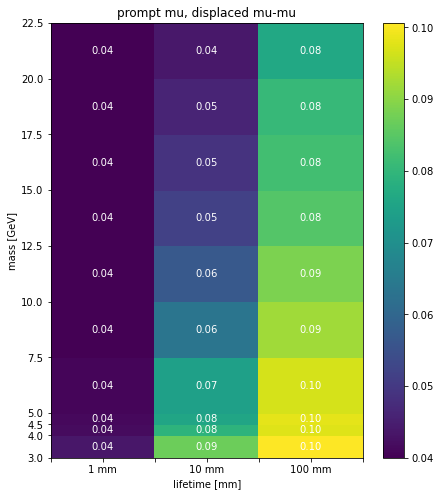

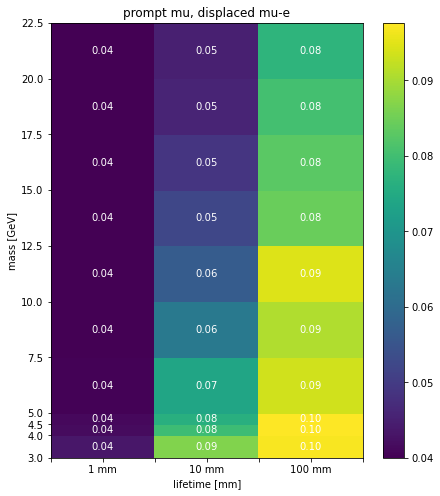

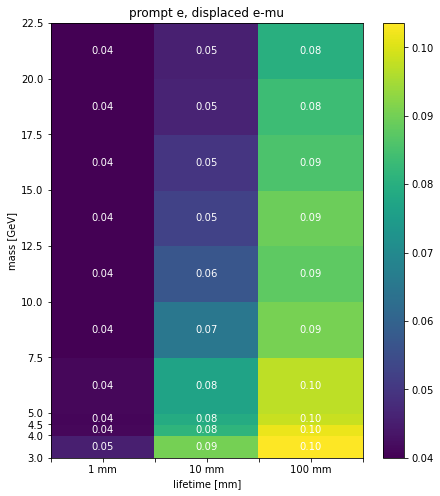

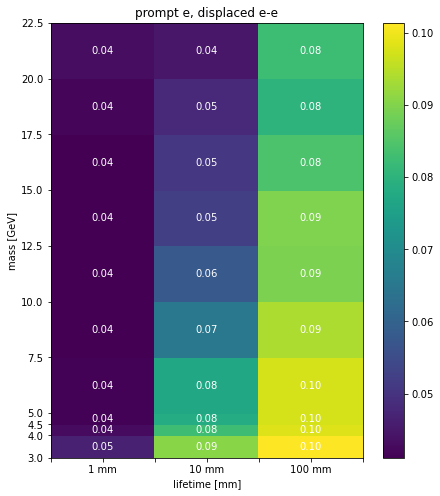

In [118]:
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_uuu_*', title='prompt mu, displaced mu-mu')
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_uue_*', title='prompt mu, displaced mu-e')
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_eeu_*', title='prompt e, displaced e-mu')
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_eee_*', title='prompt e, displaced e-e')


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

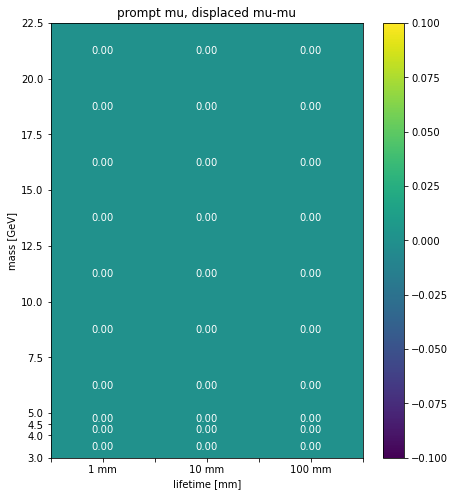

In [111]:
make_uncertainty_plot(histpath='/data/hnl/v4p10_histograms/histograms_mc16e_uuu_*', title='prompt mu, displaced mu-mu')


In [3]:
f = uproot.open('/data/hnl/v4_histograms_new/histograms_mc16e_uuu_4G_100mm.root')
DV_vertexing_uncertainty_LNV = f['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty']
DV_vertexing_uncertainty_LNC = f['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty']
DV_vertexing_uncertainty = np.concatenate([DV_vertexing_uncertainty_LNV.array(), DV_vertexing_uncertainty_LNC.array()])
mean = DV_vertexing_uncertainty.mean()
mean


0.9064177048114374

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


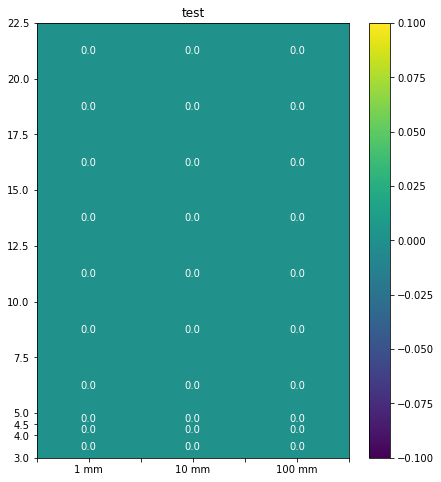

In [80]:
uncertianty_arr = np.array([
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
])
masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}


plt.figure(figsize=[7,8])

plt.pcolormesh([0,1,2,3], masses, uncertianty_arr, shading='auto')

plt.colorbar()
ax = plt.gca()
ax.set_xticklabels(['','1 mm', '', '10 mm', '', '100 mm',])
ax.set_yticks(masses)
ax.set_title('test')

for i in range(len(masses)-1):
    for j in range(len(lifetimes)):
        yloc = j+.5
        xloc = masses[i] + (masses[i+1]-masses[i])/2 
        text = ax.text(yloc, xloc , uncertianty_arr[i,j],
                       ha="center", va="center", color="w", transform=ax.transData)


In [40]:
import uproot
import glob
import numpy as np

f = uproot.open('/data/hnl/histograms/v5p0_histograms/histograms_all.root')
df = f['VSI_LeptonsMod_ntuples_LNC_plus_LNV_DVtype'].pandas.df()

len(df)
# for fff in glob.glob('/data/hnl/histograms/v5p0_histograms/*mc16*'):
#     print(uproot.open(fff).keys())
#     df = uproot.open(fff)['VSI_LeptonsMod_ntuples_DVtype'].pandas.df(['DV_lep_*_*', 'DV_trk_*_*'])
#     break



26032

In [41]:
df

DV_weight_LNC_only  DV_weight_LNC_plus_LNV  event_is_LNC  event_is_LNV  \
entry                                                                           
0                0.000395                0.000099           0.0           1.0   
1                0.000409                0.000102           1.0           0.0   
2                0.001440                0.000360           0.0           1.0   
3                0.000044                0.000011           0.0           1.0   
4                0.000466                0.000116           1.0           0.0   
...                   ...                     ...           ...           ...   
26027            0.003323                0.000831           1.0           0.0   
26028            0.095494                0.023873           0.0           1.0   
26029            0.260413                0.065103           1.0           0.0   
26030            0.179405                0.044851           0.0           1.0   
26031            0.194164                0.048541           1.0           0.0   

         plep_pt  plep_eta  plep_phi   plep_d0   plep_z0  plep_charge  ...  \
entry                                                                  ...   
0      40.008633 -0.713018  0.996076 -0.027661 -0.009090         -1.0  ...   
1      31.805002 -0.578687 -1.674158  0.056402 -0.089218         -1.0  ...   
2      40.511154  0.482665  1.498943 -0.021518 -0.030163          1.0  ...   
3      32.624207  2.080365  2.496983 -0.036359  0.009804         -1.0  ...   
4      43.553703  1.048495 -2.918636  0.011856  0.006863          1.0  ...   
...          ...       ...       ...       ...       ...          ...  ...   
26027  35.361893  0.946265 -2.679029 -0.005962  0.107506          1.0  ...   
26028  34.981331 -2.100306  0.430706 -0.012708  0.003836         -1.0  ...   
26029  42.243748 -0.223216 -0.925529 -0.016270 -0.018877          1.0  ...   
26030  34.892231 -0.200104  0.659627 -0.020667 -0.003942          1.0  ...   
26031  67.508224  1.900788  0.636737 -0.017963  0.710319         -1.0  ...   

       DV_tight_veryloose  DV_medium_veryloose  DV_loose_veryloose  \
entry                                                                
0                     0.0                  0.0                 0.0   
1                     0.0                  0.0                 0.0   
2                     0.0                  0.0                 0.0   
3                     0.0                  0.0                 0.0   
4                     0.0                  0.0                 0.0   
...                   ...                  ...                 ...   
26027                 0.0                  0.0                 0.0   
26028                 0.0                  0.0                 0.0   
26029                 0.0                  0.0                 0.0   
26030                 0.0                  0.0                 0.0   
26031                 0.0                  0.0                 0.0   

       DV_tight_veryveryloose  DV_medium_veryveryloose  \
entry                                                    
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
26027                     0.0                      0.0   
26028                     0.0                      0.0   
26029                     0.0                      0.0   
26030                     0.0                      0.0   
26031                     0.0                      0.0   

       DV_loose_veryveryloose  DV_2veryveryloose  DV_1veryveryloose  \
entry                                                                 
0                         0.0                1.0                0.0   
1                         0.0                1.0           

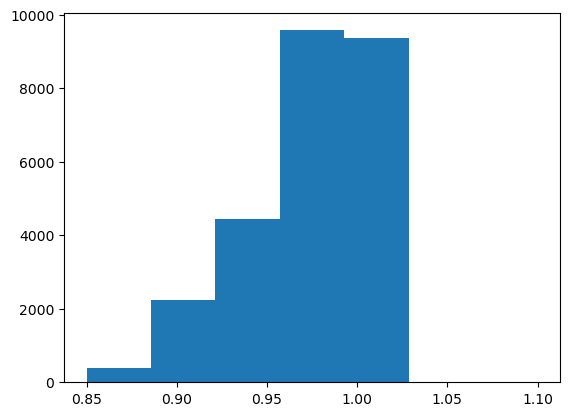

In [48]:
plt.figure()
plt.hist(df['d0_extrapolation_1DOWN'].array, bins=np.linspace(.85,1.1,8))
plt.show();